# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_inp = pd.read_csv('HW-15 Data\\googleplaystore.csv',thousands=',' )
print(df_inp.shape)
df_main = df_inp.dropna(thresh=12)
print(df_main.info())

df_main.head() 

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Data columns (total 13 columns):
App               10835 non-null object
Category          10835 non-null object
Rating            9366 non-null float64
Reviews           10835 non-null object
Size              10835 non-null object
Installs          10835 non-null object
Type              10835 non-null object
Price             10835 non-null object
Content Rating    10835 non-null object
Genres            10835 non-null object
Last Updated      10835 non-null object
Current Ver       10831 non-null object
Android Ver       10833 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df_inp_users = pd.read_csv('HW-15 Data\\googleplaystore_user_reviews.csv',thousands=',')
print(df_inp_users.shape)
df_users = df_inp_users.dropna(thresh=3)
print(df_users.info())
df_users.head()

(64295, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
App                       37432 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB
None


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


In [108]:
#Ищем ошибочные символы
#df = df_inp['Reviews'].replace(to_replace="[0-9]+", value="")
#df.loc[df != '']

#df_main['Reviews'] = df_main['Reviews'].apply(lambda x: int(x))
#Заменяем ошибочные записи:
df_main['Price'] = df_main['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df_main['Price'] = df_main['Price'].apply(lambda x: float(x))

df_main['Reviews'] = df_main['Reviews'].astype('float64')
df_main['Price'] = df_main['Price'].astype('float64')

df_main['Installs'] = df_main['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df_main['Installs'] = df_main['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df_main['Installs'] = df_main['Installs'].apply(lambda x: float(x))

df_main['Size'] = df_main['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_main['Size'] = df_main['Size'].apply(lambda x: float(str(x).replace('M', '')) * 1000 if 'M' in str(x) else x)
df_main['Size'] = df_main['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_main['Size'] = df_main['Size'].apply(lambda x: float(str(x).replace('k', '')) if 'k' in str(x) else x)
df_main['Size'] = df_main['Size'].apply(lambda x: float(x))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [82]:
df_main['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [83]:
df_main.loc[df_main['Rating'] == 19] = np.NaN

In [84]:
df_main.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.083500e+04,9141.000000,1.083500e+04,10835.000000
mean,4.191757,4.443579e+05,21525.035062,1.547147e+07,1.027751
std,0.515219,2.928421e+06,22589.944322,8.504833e+07,15.953371
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4900.000000,5.000000e+03,0.000000
50%,4.300000,2.099000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.480250e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [8]:
df_users.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [85]:
rating_by_category = df_main[['Rating','Category']].groupby('Category').mean()
rating_by_category

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769
EDUCATION,4.389032


In [22]:
def rate_class(date):
    try:
        date_new = datetime.datetime.strptime(date, '%B %d, %Y')
        return datetime.date(date_new.year, (date_new.month % 12) + 1, 1)- datetime.timedelta (days = 1)#datetime.date(date_new.year, (date_new.month % 12) + 1, 1)- datetime.timedelta (days = 1)
    except TypeError as err:
        return err

df_main['date_last_update'] = df_main['Last Updated'].apply(rate_class) 
df_main.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date_last_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-31
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-31
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-31
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-30


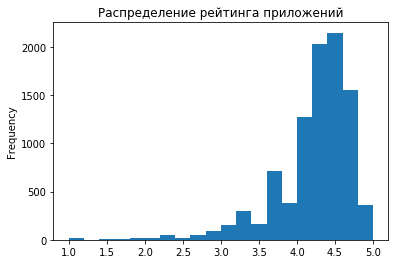

In [86]:
df_main['Rating'].plot(kind='hist', title='Распределение рейтинга приложений', bins=20)
#Преобладает достаточно высокий рейтинг

Text(0, 0.5, 'test')

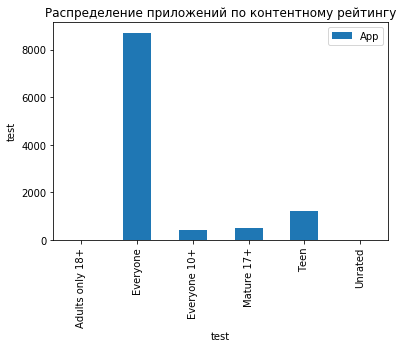

In [41]:
count_by_content = df_main[['App','Content Rating']].groupby('Content Rating').count()
count_by_content.plot(kind='bar', 
                      title='Распределение приложений по контентному рейтингу',)
plt.xlabel('Контентные группы')
plt.ylabel('Количество приложений')
#Самая популярная категория - для всех

Text(0.5, 1, 'Корреляция')

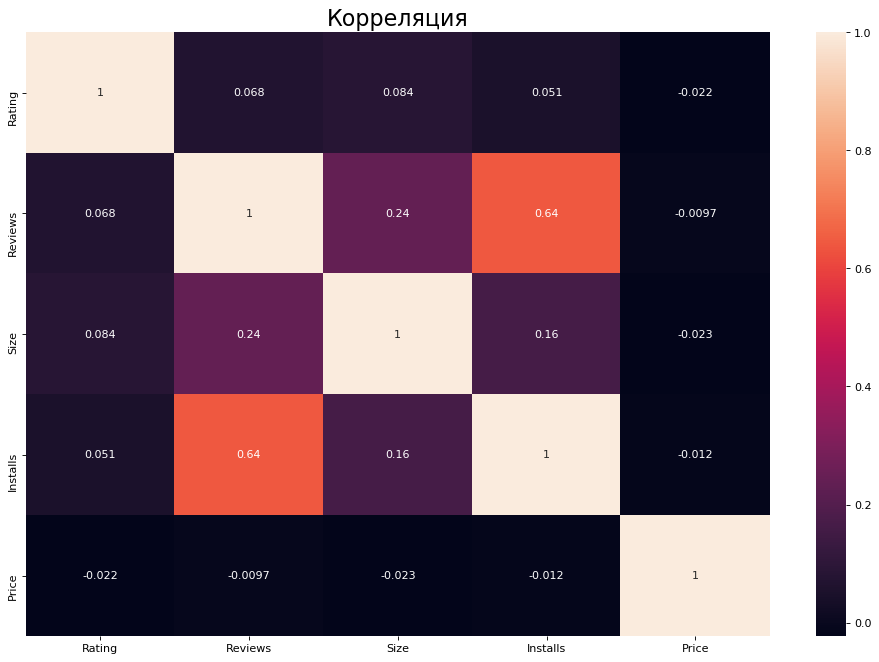

In [119]:
#Хитмап корреляции
plt.figure(figsize=(15,10), dpi= 80)
sns.heatmap(df_main.corr(), annot=True)
plt.title('Корреляция', size = 20)
#Самая явная связь - количество установок с количестом отзывов

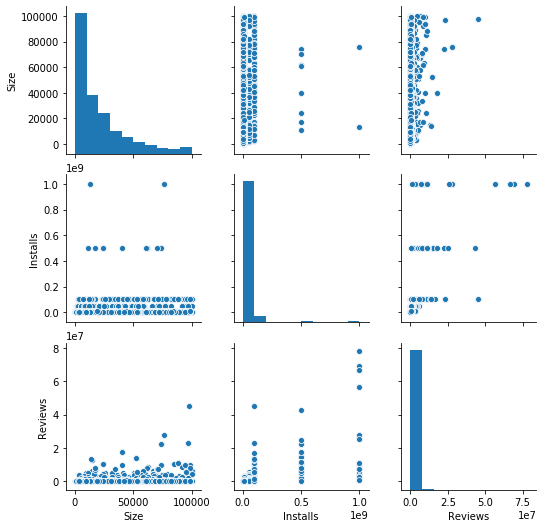

In [127]:
#Матрица по размеру приложения, установкам и отзывам
sns.pairplot(df_main[['Size','Installs','Reviews']])
#Обраащет на себя свнимание соотношение отзывов к размерук приложения

Text(0.5, 1.0, 'Связь между размером приложения и количеством отзывов')

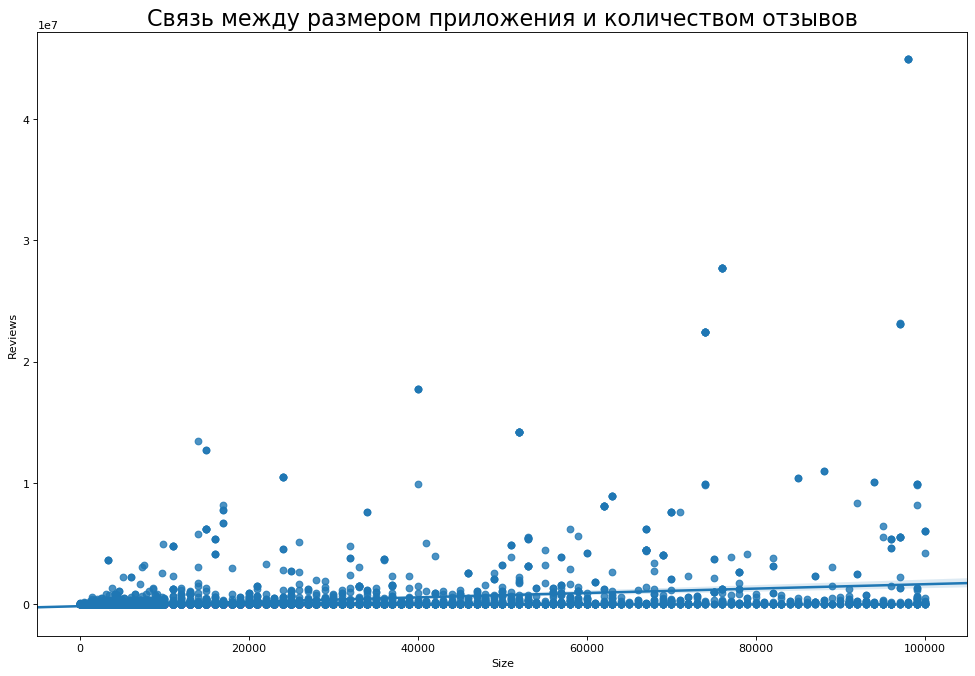

In [128]:
#Связь между размером приложения и количеством отзывов
plt.figure(figsize=(15,10), dpi= 80)
sns.regplot(x='Size', 
            y='Reviews', 
            data= df_main)
plt.title('Связь между размером приложения и количеством отзывов', size = 20)
#Можем приедполжить слабую корреляцию между размером и количеством отзывов

Text(0.5, 1.0, 'Распределение размера приложений по категориям')

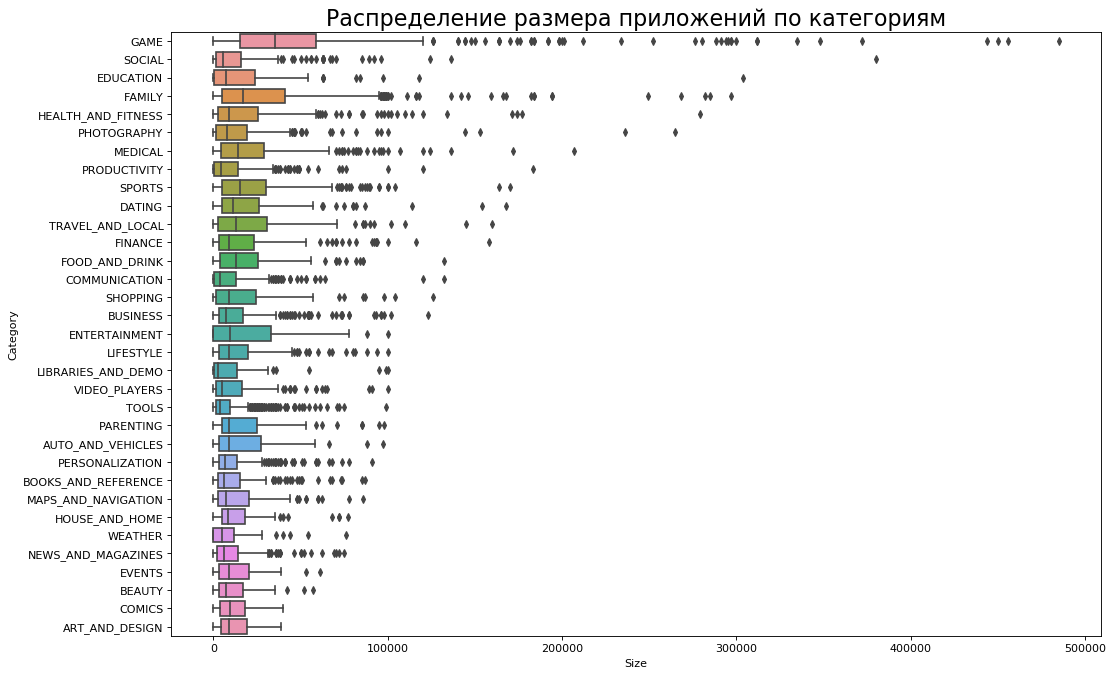

In [117]:
#Распределение размера приложений по категориям
size = df_main.groupby(['Category','App'])['Size'].sum().sort_values(ascending = False).reset_index()
size.dropna(inplace = True) 

plt.figure(figsize=(15,10), dpi= 80)
sns.boxplot(x='Size', 
             y='Category', 
             data= size , 
             notch=False)
plt.title('Распределение размера приложений по категориям', size = 20)
#Игры предсказуемо занимают больше всего места, в то время как tools- меньше всех


In [21]:
#Дополняем данными о типе пирложения
df_users.set_index('App').join(df_main[['App','Category']].set_index('App'), on='App', how='left', lsuffix='_l', rsuffix='_r', sort=False)

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
App,,,,,
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS
10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS
10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS
10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS
10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS
10 Best Foods for You,Best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.